In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from scipy import stats
from sklearn.model_selection import train_test_split
from statistics import LinearRegression
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

In [2]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

# IMPORT DATASETS

In [3]:
train_df

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
0,0,120.0,24.0,6.9,0.314,7.1,0.498,48.0,510.0,23.20,240.0,90.4
1,1,140.0,41.0,11.0,0.150,6.5,0.950,19.0,300.0,8.50,190.0,130.0
2,2,160.0,51.0,9.0,0.450,9.1,2.500,12.0,370.0,25.00,230.0,160.0
3,3,46.0,13.0,2.9,0.120,2.7,0.430,6.4,110.0,5.00,97.0,41.0
4,4,240.0,147.0,70.0,0.600,48.0,6.800,93.0,1410.0,418.00,950.0,586.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6395,6395,180.0,58.0,40.0,0.180,25.0,3.600,22.0,540.0,48.00,400.0,219.0
6396,6396,44.0,5.7,3.0,0.120,3.7,0.470,5.9,100.0,0.85,56.0,30.0
6397,6397,138.0,40.3,28.4,0.100,14.2,8.600,31.0,438.0,17.70,300.0,159.0
6398,6398,210.0,110.0,190.0,0.230,47.0,7.900,120.0,1400.0,140.00,800.0,470.0


In [4]:
test_df.describe()

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids
count,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000
mean,7200.000000,168.832299,55.668958,51.481462,0.349397,62.757297,3.423275,77.886431,659.276702,75.164221,409.850094
std,462.313206,82.953613,41.717342,77.520902,0.551632,1724.080876,4.968633,780.983717,620.275872,121.649147,271.134286
min,6400.000000,9.400000,0.260000,0.460000,0.000000,0.064000,0.004740,2.200000,66.000000,0.390000,29.000000
25%,6800.000000,110.000000,26.000000,12.000000,0.140000,7.800000,0.770000,21.000000,351.000000,13.100000,230.000000
50%,7200.000000,160.000000,46.200000,31.000000,0.210000,15.000000,2.000000,35.000000,530.000000,34.000000,330.000000
75%,7600.000000,210.000000,74.000000,63.000000,0.380000,25.000000,4.300000,61.000000,815.000000,94.600000,510.000000
max,8000.000000,700.000000,460.000000,1300.000000,9.900000,69000.000000,58.200000,27400.000000,17400.000000,2100.000000,2300.000000


# DATA PREP

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6400 non-null   int64  
 1   Alkalinity, total       6400 non-null   float64
 2   Calcium                 6400 non-null   float64
 3   Chloride                6400 non-null   float64
 4   Fluoride                6400 non-null   float64
 5   Magnesium               6400 non-null   float64
 6   Nitrate as N            6400 non-null   float64
 7   Sodium                  6400 non-null   float64
 8   Specific Conductivity   6400 non-null   float64
 9   Sulfate                 6400 non-null   float64
 10  Total Dissolved Solids  6400 non-null   float64
 11  Hardness                6400 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 600.1 KB


In [6]:
train_df.describe()

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
count,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000
mean,3199.500000,167.151047,69.350432,53.213620,0.333625,23.446335,3.382707,62.437731,637.631953,71.645934,409.570669,216.148203
std,1847.665193,83.157803,1052.136452,92.934505,0.452473,325.389503,4.878279,556.891904,597.297274,108.414049,302.958442,161.431526
min,0.000000,12.000000,0.610000,0.580000,0.049000,0.051000,0.002300,1.300000,40.000000,0.140000,19.580000,2.500000
25%,1599.750000,110.000000,25.000000,11.000000,0.140000,7.300000,0.850000,21.000000,340.000000,13.000000,220.000000,101.000000
50%,3199.500000,153.500000,45.000000,28.000000,0.210000,14.000000,2.000000,35.000000,520.000000,33.000000,320.000000,180.000000
75%,4799.250000,209.000000,72.000000,62.000000,0.382250,25.000000,4.300000,60.000000,800.000000,85.000000,500.000000,281.000000
max,6399.000000,1000.000000,83000.000000,2100.000000,9.000000,26000.000000,106.000000,32000.000000,31400.000000,2000.000000,4100.000000,1901.000000


## Drop Unuse Feature

In [7]:
train_df = train_df.drop(columns=['id'])

## Handle Null Values

In [8]:
train_df.isnull().sum()

Alkalinity, total         0
Calcium                   0
Chloride                  0
Fluoride                  0
Magnesium                 0
Nitrate as N              0
Sodium                    0
Specific Conductivity     0
Sulfate                   0
Total Dissolved Solids    0
Hardness                  0
dtype: int64

## Handle Outlier

In [9]:
def percentage_outliers_iqr(df):
    outliers_percentage = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
        total = len(df[column])
        percentage = (outliers / total) * 100
        outliers_percentage[column] = percentage
    return outliers_percentage


In [10]:
outliers_percentage = percentage_outliers_iqr(train_df)

In [11]:
def removeOutlier(df, col):
    kuartil1 = col.quantile(0.25)
    kuartil3 = col.quantile(0.75)
    IQR = kuartil3 - kuartil1
    lower_bound = kuartil1 - 1.5 * IQR
    upper_bound = kuartil3 + 1.5 * IQR
    df = df[(col >= lower_bound) & (col <= upper_bound)]
    return df

In [12]:
clean_train_df = train_df.copy()

outliers_percentage = percentage_outliers_iqr(clean_train_df)

for col in clean_train_df.columns:
    if col != "id" and clean_train_df[col].dtypes != object:
        if outliers_percentage[col] > 5:
            clean_train_df[col] = np.log1p(clean_train_df[col])
        else:
            clean_train_df = removeOutlier(clean_train_df, clean_train_df[col])
        

In [13]:
clean_train_df

,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
0,120.0,24.0,2.066863,0.273076,2.091864,0.404131,3.891820,510.0,3.186353,5.484797,90.4
1,140.0,41.0,2.484907,0.139762,2.014903,0.667829,2.995732,300.0,2.251292,5.252273,130.0
2,160.0,51.0,2.302585,0.371564,2.312535,1.252763,2.564949,370.0,3.258097,5.442418,160.0
3,46.0,13.0,1.360977,0.113329,1.308333,0.357674,2.001480,110.0,1.791759,4.584967,41.0
5,154.0,49.2,3.951244,0.223144,2.451005,0.438255,3.964615,619.0,4.615121,5.826000,198.0
...,...,...,...,...,...,...,...,...,...,...,...
6393,115.0,27.9,2.766319,0.095310,2.322388,1.360977,3.091042,292.0,1.629241,5.384495,113.0
6395,180.0,58.0,3.713572,0.165514,3.258097,1.526056,3.135494,540.0,3.891820,5.993961,219.0
6396,44.0,5.7,1.386294,0.113329,1.547563,0.385262,1.931521,100.0,0.615186,4.043051,30.0
6397,138.0,40.3,3.380995,0.095310,2.721295,2.261763,3.465736,438.0,2.928524,5.707110,159.0


## Feature Correlation

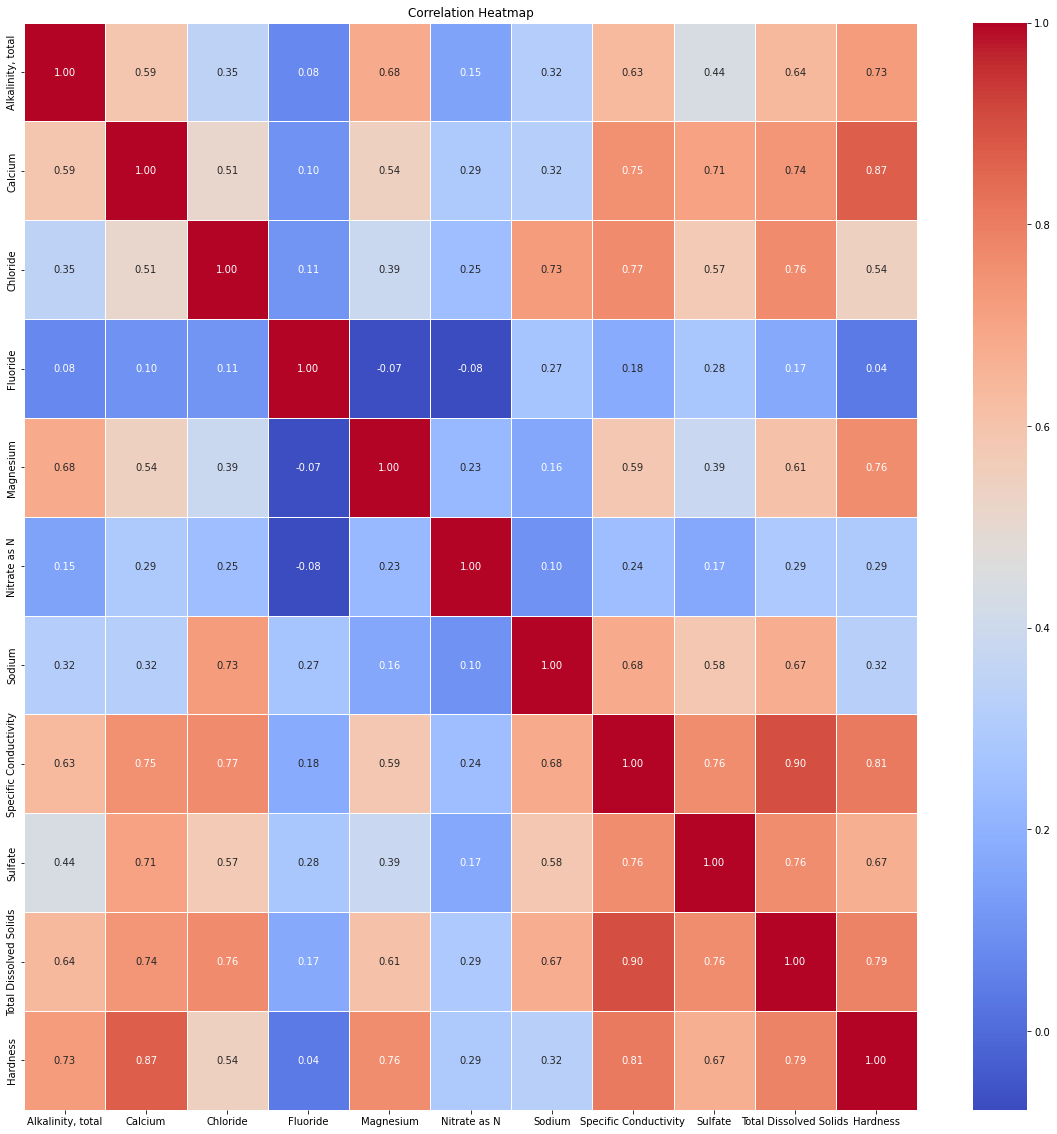

In [14]:
# Calculate the correlation matrix
correlation_matrix = clean_train_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [15]:
correlation_matrix.loc[abs(correlation_matrix["Hardness"]) > 0.5]["Hardness"]
final_feat = correlation_matrix.loc[abs(correlation_matrix["Hardness"]) > 0.5]["Hardness"].index.tolist()
clean_train_df = clean_train_df[final_feat]

In [16]:
clean_train_df.describe()

,"Alkalinity, total",Calcium,Chloride,Magnesium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
count,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000
mean,154.255494,46.671512,3.201088,2.529553,531.407192,3.352391,5.717488,181.621282
std,64.660236,28.259291,1.015936,0.812991,266.130708,1.140360,0.496596,105.101574
min,21.000000,1.000000,0.457425,0.049742,40.000000,0.131028,3.024320,3.500000
25%,110.000000,24.000000,2.397895,2.054124,320.000000,2.553321,5.353040,99.000000
50%,150.000000,41.200000,3.218876,2.639057,480.000000,3.367296,5.707110,160.000000
75%,190.000000,65.000000,3.970292,3.091042,690.000000,4.219508,6.066108,250.000000
max,355.000000,140.000000,6.523562,10.165890,1350.000000,6.311735,7.741099,487.000000


# Modelling

In [17]:
X = clean_train_df.drop(columns=['Hardness'])
y = clean_train_df['Hardness']

# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)

In [18]:

# best_params = {'n_estimators': 76, 'max_depth': 32, 'min_samples_split': 2, 'min_samples_leaf': 1, 'random_state' : 42} 

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_predtrain_rf = rf.predict(X_train)
print(r2_score(y_predtrain_rf, y_train))

0.9884227434189218


In [20]:
import catboost

cboost = catboost.CatBoostRegressor(random_state=42)
cboost.fit(X_train, y_train)

y_predtrain_cboost = cboost.predict(X_train)
print(r2_score(y_predtrain_cboost, y_train))

Learning rate set to 0.052136
0:	learn: 100.7728177	total: 138ms	remaining: 2m 17s
1:	learn: 96.5235621	total: 140ms	remaining: 1m 9s
2:	learn: 92.5242702	total: 142ms	remaining: 47.1s
3:	learn: 88.6137682	total: 143ms	remaining: 35.7s
4:	learn: 85.0049934	total: 145ms	remaining: 28.9s
5:	learn: 81.5733169	total: 147ms	remaining: 24.3s
6:	learn: 78.5421599	total: 149ms	remaining: 21.1s
7:	learn: 75.5570261	total: 151ms	remaining: 18.7s
8:	learn: 72.6940095	total: 153ms	remaining: 16.8s
9:	learn: 69.9884284	total: 154ms	remaining: 15.3s
10:	learn: 67.4562140	total: 156ms	remaining: 14s
11:	learn: 64.9522750	total: 158ms	remaining: 13s
12:	learn: 62.6399443	total: 159ms	remaining: 12.1s
13:	learn: 60.4504649	total: 161ms	remaining: 11.3s
14:	learn: 58.4348046	total: 162ms	remaining: 10.7s
15:	learn: 56.5143187	total: 164ms	remaining: 10.1s
16:	learn: 54.6615170	total: 166ms	remaining: 9.59s
17:	learn: 52.9128911	total: 168ms	remaining: 9.14s
18:	learn: 51.3747919	total: 169ms	remaining: 

In [25]:
from sklearn.svm import SVR

svr = SVR()

svr.fit(X_train, y_train)

SVR()

In [26]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors = 15)

knn.fit(X_train, y_train) 
y_pred = knn.predict(X_val) 
r2 = r2_score(y_val, y_pred)

In [27]:
from sklearn.ensemble import BaggingRegressor

bag_knn = BaggingRegressor(estimator=knn, n_estimators=10, random_state=42)

bag_knn.fit(X_train, y_train)

# Predict with bagged
y_predtrain_bag_knn = bag_knn.predict(X_train)
y_predval_bag_knn = bag_knn.predict(X_val)
r2train_bag_knn = r2_score(y_train, y_predtrain_bag_knn)
r2val_bag_knn = r2_score(y_val, y_predval_bag_knn)
print(f"bag_knn r2 train =  {r2train_bag_knn}, bag_knn r2 val = {r2val_bag_knn}, bag_knn r2 diff = {r2train_bag_knn-r2val_bag_knn}")

bag_knn r2 train =  0.8490957601875274, bag_knn r2 val = 0.7997239436590629, bag_knn r2 diff = 0.04937181652846456


In [28]:
from sklearn.ensemble import BaggingRegressor

bag_svr = BaggingRegressor(estimator=svr, n_estimators=10, random_state=42)

bag_knn.fit(X_train, y_train)

# Predict with bagged
y_predtrain_bag_knn = bag_knn.predict(X_train)
y_predval_bag_knn = bag_knn.predict(X_val)
r2train_bag_knn = r2_score(y_train, y_predtrain_bag_knn)
r2val_bag_knn = r2_score(y_val, y_predval_bag_knn)
print(f"bag_knn r2 train =  {r2train_bag_knn}, bag_knn r2 val = {r2val_bag_knn}, bag_knn r2 diff = {r2train_bag_knn-r2val_bag_knn}")

bag_knn r2 train =  0.8490957601875274, bag_knn r2 val = 0.7997239436590629, bag_knn r2 diff = 0.04937181652846456


In [29]:
from mlxtend.regressor import StackingCVRegressor

stack = StackingCVRegressor(regressors=(svr, bag_knn),
                            meta_regressor=svr, cv=5,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stack.fit(X_train, y_train)

StackingCVRegressor(meta_regressor=SVR(), random_state=42,
                    regressors=(SVR(),
                                BaggingRegressor(estimator=KNeighborsRegressor(n_neighbors=15),
                                                 random_state=42)),
                    shuffle=False, store_train_meta_features=True,
                    use_features_in_secondary=True)

In [30]:
from sklearn.ensemble import VotingRegressor

voting = VotingRegressor(estimators=[('svr', svr), ('bag_knn', bag_knn), ('knn', knn), ('bag_svr', bag_svr)])

voting.fit(X_train, y_train)

VotingRegressor(estimators=[('svr', SVR()),
                            ('bag_knn',
                             BaggingRegressor(estimator=KNeighborsRegressor(n_neighbors=15),
                                              random_state=42)),
                            ('knn', KNeighborsRegressor(n_neighbors=15)),
                            ('bag_svr',
                             BaggingRegressor(estimator=SVR(),
                                              random_state=42))])

## NeuralNet

In [31]:
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasRegressor

random_state = 42
np.random.seed(random_state)
tf.random.set_seed(random_state)
random.seed(random_state)

KeyboardInterrupt: 

In [ ]:
random_state = 42
np.random.seed(random_state)
tf.random.set_seed(random_state)
random.seed(random_state)

# Define R² metric function using TensorFlow
def tf_r2_score(y_true, y_pred):
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - SS_res / (SS_tot + tf.keras.backend.epsilon())

# Best parameters from Optuna
# params = {
#     'layer_1': 7,
#     'layer_2': 2,
#     'layer_3': 5,
#     'learning_rate': 0.018708417846516115,
#     'dropout_rate': 0.0022822336772516688,
#     'epoch': 75,
#     'batch_size': 10,
#     'optimizer': 'Adam'
# }

def create_model():
    # Optimizer
    optimizer = Adamax(learning_rate=0.01)
    # Define the neural network model
    neural_network = Sequential()
    neural_network.add(Dense(16, input_shape=(X_train.shape[1],), activation='relu'))
    # neural_network.add(Dropout(params['dropout_rate']))
    neural_network.add(Dense(32, activation='relu'))
    # neural_network.add(Dropout(params['dropout_rate']))
    neural_network.add(Dense(64, activation='relu'))
    # neural_network.add(Dropout(params['dropout_rate']))
    neural_network.add(Dense(1, activation='linear'))  # Use 'linear' activation for regression

    neural_network.compile(loss='mean_squared_error', optimizer=optimizer, metrics=[tf_r2_score])
    return neural_network

neural_network = KerasRegressor(model=create_model, epochs=100, batch_size=32, verbose=1)

# Early stopping
early_stopping = EarlyStopping(monitor='val_tf_r2_score', patience=5, restore_best_weights=True)

# Train the model
neural_network.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=2)

# Predict and evaluate
y_pred = neural_network.predict(X_train).flatten()  # Ensure y_pred is 1-dimensional
r2 = tf_r2_score(tf.convert_to_tensor(y_train, dtype=tf.float32), tf.convert_to_tensor(y_pred, dtype=tf.float32))

print("R² on training data:", r2.numpy())


Epoch 1/100


c:\Users\Dama\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


116/116 - 1s - 13ms/step - loss: 2727.1128 - tf_r2_score: -5.1705e+01 - val_loss: 2053.8765 - val_tf_r2_score: -5.0469e+01
Epoch 2/100
116/116 - 0s - 1ms/step - loss: 1848.3765 - tf_r2_score: -5.3962e+01 - val_loss: 1769.9900 - val_tf_r2_score: -5.4238e+01
Epoch 3/100
116/116 - 0s - 2ms/step - loss: 1760.3990 - tf_r2_score: -5.5226e+01 - val_loss: 1722.4857 - val_tf_r2_score: -5.4489e+01
Epoch 4/100
116/116 - 0s - 1ms/step - loss: 1707.9069 - tf_r2_score: -5.5814e+01 - val_loss: 1665.9354 - val_tf_r2_score: -5.5828e+01
Epoch 5/100
116/116 - 0s - 1ms/step - loss: 1685.4847 - tf_r2_score: -5.6296e+01 - val_loss: 1636.2747 - val_tf_r2_score: -5.6411e+01
Epoch 6/100
116/116 - 0s - 1ms/step - loss: 1659.6395 - tf_r2_score: -5.6642e+01 - val_loss: 1612.3716 - val_tf_r2_score: -5.6574e+01
Epoch 7/100
116/116 - 0s - 1ms/step - loss: 1636.6013 - tf_r2_score: -5.7072e+01 - val_loss: 1594.2717 - val_tf_r2_score: -5.6781e+01
Epoch 8/100
116/116 - 0s - 1ms/step - loss: 1620.5077 - tf_r2_score: -5.7

# Submission

In [32]:
test_df

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids
0,6400,93.0,15.9,3.6,0.100,11.90,1.400,12.7,208.0,6.5,156.0
1,6401,180.0,34.0,200.0,1.900,8.20,1.300,300.0,1700.0,210.0,860.0
2,6402,95.0,44.0,35.0,0.081,3.30,1.100,28.0,390.0,22.0,240.0
3,6403,110.0,29.0,12.0,0.250,6.00,0.150,23.0,283.0,15.0,190.0
4,6404,179.0,59.0,51.7,0.160,45.00,4.100,64.0,976.0,170.0,430.0
...,...,...,...,...,...,...,...,...,...,...,...
1596,7996,88.0,30.0,11.0,0.170,3.20,1.217,24.0,289.0,22.0,140.0
1597,7997,64.0,21.0,18.0,0.050,0.68,4.700,31.0,327.0,28.0,160.0
1598,7998,210.0,32.0,53.0,0.150,24.00,0.120,68.0,570.0,25.0,670.0
1599,7999,230.0,82.0,14.0,0.100,9.00,2.000,19.0,580.0,24.0,310.0


In [35]:
test_pred = stack.predict(test_df[X_train.columns])
predicting_model = "stack"

submission_df = pd.DataFrame(test_df["id"])
submission_df["Hardness"] = test_pred

submission_df


c:\Users\Dama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
c:\Users\Dama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(


,id,Hardness
0,6400,86.562065
1,6401,211.635304
2,6402,134.044771
3,6403,107.161298
4,6404,264.982769
...,...,...
1596,7996,96.577563
1597,7997,98.559818
1598,7998,210.135757
1599,7999,234.621506


In [36]:
from datetime import datetime
submission_df.to_csv(("submission-" + predicting_model + datetime.now().strftime("-%Y %m %d_%Hh %Mm %Ss") + ".csv") , index=False)